In [48]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify    # pip install squarify (algorithm for treemap)
import seaborn as sns


%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)

ModuleNotFoundError: No module named 'brian2'

In [7]:
#pick colormaps
cm= {}
cm['E'] = 'light red'
cm['I'] = 'cerulean'
cmap={}
for key, color in cm.items():
    cmap[key] = sns.xkcd_rgb[color]

Let's start with the numbers of cells in each layer
- L1 has 3375E + 1125I = 4500 total
- L2 has 10125E + 3400I = 13525 total
- L3 has 6300E + 4200I = 10500 total


In [8]:
sns.set_style('dark')
sns.set_context('talk')

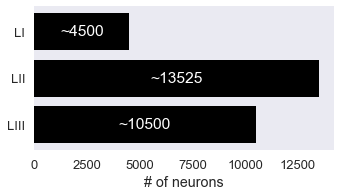

In [13]:
f,ax = plt.subplots(figsize = (5,3))
E_total = np.array([3375,10125,6300])
I_total = np.array([1125,3400,4200])
total = E_total + I_total
order =[2,1,0]
ax.barh(y = order,width = total, color = 'k')
ax.set_yticks([0,1,2])
ax.set_yticklabels(['LIII','LII','LI'])
for i in [0,1,2]:
    plt.text(total[order[i]]/2,i,'~'+str(total[order[i]]),
             horizontalalignment='center',verticalalignment='center',color = 'w')
ax.set_xlabel('# of neurons')
plt.tight_layout()
f.savefig('/Users/nakaa1/Documents/Presentations/group_meeting_20190329/cellnums.png',dpi = 300)

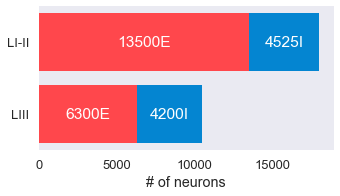

In [12]:
# f,ax = plt.subplots()
# E_total = [3375,10125,6300]
# I_total = [1125,3400,4200]
# order =[2,1,0]
# ax.barh(y = order,width = E_total, color = cmap['E'])
# ax.barh(y = order,width = I_total, left = E_total, color = cmap['I'])
# ax.set_yticks([0,1,2])
# ax.set_yticklabels(['L3','L2','L1'])

# for i in [0,1,2]:
#     plt.text(E_total[order[i]]/2,i,str(E_total[order[i]])+'E',
#              horizontalalignment='center',verticalalignment='center',color = 'w')
#     plt.text(E_total[order[i]]+I_total[order[i]]/2,i,str(I_total[order[i]])+'I',
#              horizontalalignment='center',verticalalignment='center',color = 'w')

f,ax = plt.subplots(figsize = (5,3))
E_total = [3375+10125,6300]
I_total = [1125+3400,4200]
order =[1,0]
ax.barh(y = order,width = E_total, color = cmap['E'])
ax.barh(y = order,width = I_total, left = E_total, color = cmap['I'])
ax.set_yticks([0,1])
ax.set_yticklabels(['LIII','LI-II'])

for i in [0,1]:
    plt.text(E_total[order[i]]/2,i,str(E_total[order[i]])+'E',
             horizontalalignment='center',verticalalignment='center',color = 'w')
    plt.text(E_total[order[i]]+I_total[order[i]]/2,i,str(I_total[order[i]])+'I',
             horizontalalignment='center',verticalalignment='center',color = 'w')
ax.set_xlabel('# of neurons')
plt.tight_layout()
f.savefig('/Users/nakaa1/Documents/Presentations/group_meeting_20190329/cellnumsEI.png',dpi = 300)

## Excitatory neurons in LI-II

We can identify at least 6 non-overlapping groups 

There are 4 molecularly defined interneuron groups that cover ~50% 
1. GRP
2. Tac1 (Preprotachykinin-1, a substance P precursor)
3. Tac2 (neurokinin B)
4. Nts

Other systems of classification overlap with these groups heterogeneously; for example, Tac2 and Nts are PKCγ+, and Sst and Calretinin have some degree of overlap with all of these.


There is another non-overlapping group of interneurons
5. vertical cells, which is lack a molecular marker

And finally
6. projection neurons, usually NK1R+

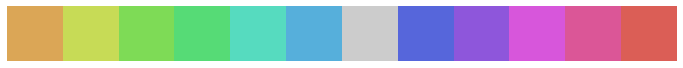

In [28]:
cms = sns.color_palette("hls", 11)
for i in range(1):
    cms.append(cms.pop(0))
cms.insert(6,(0.8,0.8,0.8))
sns.palplot(cms)

In [23]:
df = pd.DataFrame()
# df['name']= ['NK1R','Vertical','GRP','Tac1','Tac2','Nts','?','Gal','nNOS','NPY','Calb2 Islet','PV']

df['name']= ['NK1R','Vertical','GRP','Tac1','Tac2','Nts','?']
df['L12_prop'] = [0.0125,0.1875,0.15,0.15,0.156,0.09,.254]
df['L12_num'] = df['L12_prop'] *13500
df['total_num'] = df['L12_num'] + [0,0,0,315,416,788,0] # from L3

In [35]:
?squarify.plot

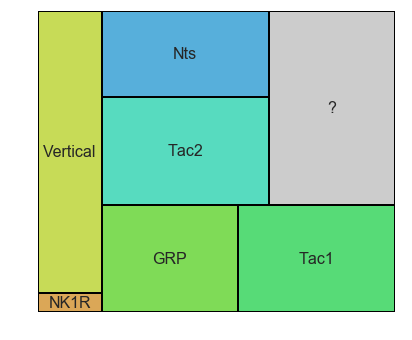

In [43]:
bar_kwargs = {'linewidth':2,'edgecolor':'k'}
text_kwargs = {'fontsize':16}
f,ax = plt.subplots(figsize = (6,5))
squarify.plot(sizes=df['total_num'], label=df['name'],
              color = cms[:7] ,bar_kwargs = bar_kwargs,text_kwargs = text_kwargs,ax = ax)
plt.axis('off')
plt.tight_layout()
plt.show()

f.savefig('/Users/nakaa1/Documents/Presentations/group_meeting_20190329/E_cells.png',dpi = 300)

In [24]:
idf = pd.DataFrame()
idf['name']= ['Gal','nNOS','NPY','Calb2 Islet','PV']
idf['total_num'] = [1131, 770, 1493, 1131, 2263]

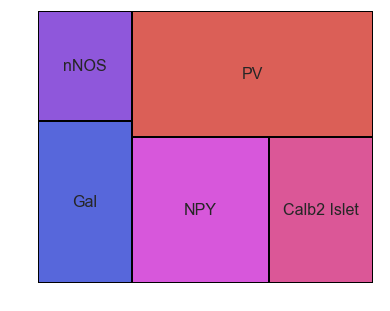

<Figure size 720x576 with 0 Axes>

In [44]:
f,ax = plt.subplots(figsize = (6,5))
bar_kwargs = {'linewidth':2,'edgecolor':'k'}
text_kwargs = {'fontsize':16}
squarify.plot(sizes=idf['total_num'], label=idf['name'],
              color = cms[7:] ,bar_kwargs = bar_kwargs,text_kwargs = text_kwargs,ax = ax)
plt.axis('off')
plt.show()
plt.tight_layout()
f.savefig('/Users/nakaa1/Documents/Presentations/group_meeting_20190329/I_cells.png',dpi = 300)

In [25]:
adf = pd.concat([df,idf])

/Users/nakaa1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [26]:
adf

,L12_num,L12_prop,name,total_num
0,168.75,0.0125,NK1R,168.75
1,2531.25,0.1875,Vertical,2531.25
2,2025.00,0.1500,GRP,2025.00
3,2025.00,0.1500,Tac1,2340.00
4,2106.00,0.1560,Tac2,2522.00
5,1215.00,0.0900,Nts,2003.00
6,3429.00,0.2540,?,3429.00
0,NaN,NaN,Gal,1131.00
1,NaN,NaN,nNOS,770.00
2,NaN,NaN,NPY,1493.00


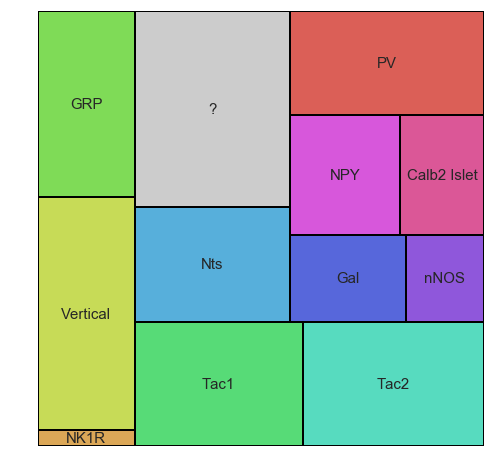

<Figure size 720x576 with 0 Axes>

In [47]:
bar_kwargs = {'linewidth':2,'edgecolor':'k'}
text_kwargs = {'fontsize':15}
f,ax = plt.subplots(figsize = (8,8))
squarify.plot(sizes=adf['total_num'], label=adf['name'],
              color = cms ,
              bar_kwargs = bar_kwargs,text_kwargs = text_kwargs,ax=ax)
plt.axis('off')
plt.show()
plt.tight_layout()
f.savefig('/Users/nakaa1/Documents/Presentations/group_meeting_20190329/EI_cells.png',dpi = 300)

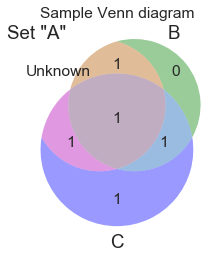

In [199]:
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(0, 0, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
# c = venn3_circles(subsets=(0, 0, 0, 0, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
# plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

In [239]:
v.get_patch_by_id('10')

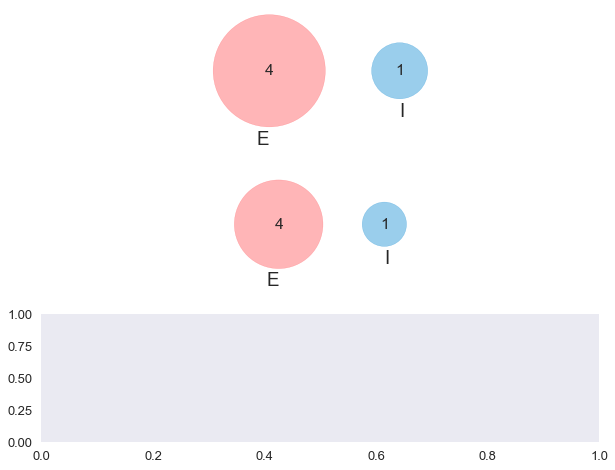

In [245]:
from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(3, 1)
v= venn2(subsets={'10': 4, '01': 1, '11': 0}, set_labels = ('E', 'I'), ax=axes[0],normalize_to = 2)
v.get_patch_by_id('10').set_color(cmap['E'])
v.get_patch_by_id('01').set_color(cmap['I'])
v= venn2(subsets={'10': 4, '01': 1, '11': 0}, set_labels = ('E', 'I'), ax=axes[1],normalize_to = 0.2)
v.get_patch_by_id('10').set_color(cmap['E'])
v.get_patch_by_id('01').set_color(cmap['I'])
plt.show()

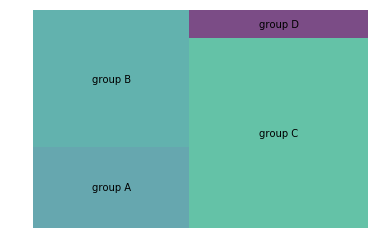

In [3]:
# If you have 2 lists
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show()

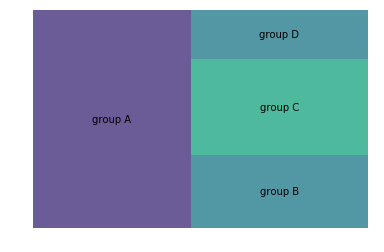

In [2]:
 
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
df = pd.read_csv('/Users/nakaa1/code/py/hackos/pubmed_search_res.csv')

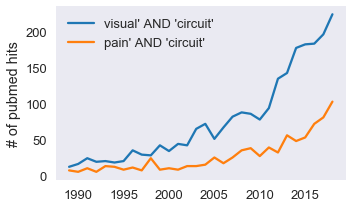

In [45]:
f, ax = plt.subplots(figsize = (5,3))
ax.plot(df['year'],df['visual\' AND \'circuit\''])
ax.plot(df['year'],df['pain\' AND \'circuit\''])
# ax.plot(df['year'],df['neural\' AND \'circuit\''])
ax.legend()
ax.set_ylabel('# of pubmed hits')
plt.tight_layout()
f.savefig('pubmed_circuit_hits.png',dpi = 400)